# Employee Retention


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('employee_retention_data.csv')
data.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


In [3]:
data.describe(include='all')

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
count,24702.000000,24702.000000,24702,24702.000000,24702.000000,24702,13510
unique,NaN,NaN,6,NaN,NaN,995,664
top,NaN,NaN,customer_service,NaN,NaN,2012-01-03,2015-05-08
freq,NaN,NaN,9180,NaN,NaN,105,111
mean,501604.403530,3.426969,NaN,14.127803,138183.345478,NaN,NaN
std,288909.026101,2.700011,NaN,8.089520,76058.184573,NaN,NaN
min,36.000000,1.000000,NaN,1.000000,17000.000000,NaN,NaN
25%,250133.750000,1.000000,NaN,7.000000,79000.000000,NaN,NaN
50%,500793.000000,2.000000,NaN,14.000000,123000.000000,NaN,NaN
75%,753137.250000,5.000000,NaN,21.000000,187000.000000,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24702 entries, 0 to 24701
Data columns (total 7 columns):
employee_id    24702 non-null float64
company_id     24702 non-null int64
dept           24702 non-null object
seniority      24702 non-null int64
salary         24702 non-null float64
join_date      24702 non-null object
quit_date      13510 non-null object
dtypes: float64(2), int64(2), object(3)
memory usage: 1.3+ MB


In [5]:
data['join_date'] = pd.to_datetime(data['join_date'])

In [6]:
data['quit_date'] = pd.to_datetime(data['quit_date'])

In [7]:
data.describe(include='all')

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
count,24702.000000,24702.000000,24702,24702.000000,24702.000000,24702,13510
unique,NaN,NaN,6,NaN,NaN,995,664
top,NaN,NaN,customer_service,NaN,NaN,2012-01-03 00:00:00,2015-05-08 00:00:00
freq,NaN,NaN,9180,NaN,NaN,105,111
first,NaN,NaN,NaN,NaN,NaN,2011-01-24 00:00:00,2011-10-13 00:00:00
last,NaN,NaN,NaN,NaN,NaN,2015-12-10 00:00:00,2015-12-09 00:00:00
mean,501604.403530,3.426969,NaN,14.127803,138183.345478,NaN,NaN
std,288909.026101,2.700011,NaN,8.089520,76058.184573,NaN,NaN
min,36.000000,1.000000,NaN,1.000000,17000.000000,NaN,NaN
25%,250133.750000,1.000000,NaN,7.000000,79000.000000,NaN,NaN


### Create a headcount for each company on a daily basis

In [8]:
import datetime
date1 = data['join_date'].min()
date2 = data['join_date'].max() + datetime.timedelta(days=3)

date_range = pd.date_range(date1, date2).tolist()
companies = data.company_id.value_counts().sort_index().index

head_count_list = []

for company in companies:
    employees = 0
    for date in date_range: 
        hire = len(data[(data['company_id']==company) & (data['join_date']==date)])
        quit = len(data[(data['company_id']==company) & (data['quit_date']==date)])
        net_hire = hire - quit
        employees += net_hire
        head_count_list.append([date, company, employees])
    
head_count = pd.DataFrame(head_count_list, columns=['date', 'company_id', 'employee_headcount'])

Text(0.5,1,'Company Employee Headcount by Day')

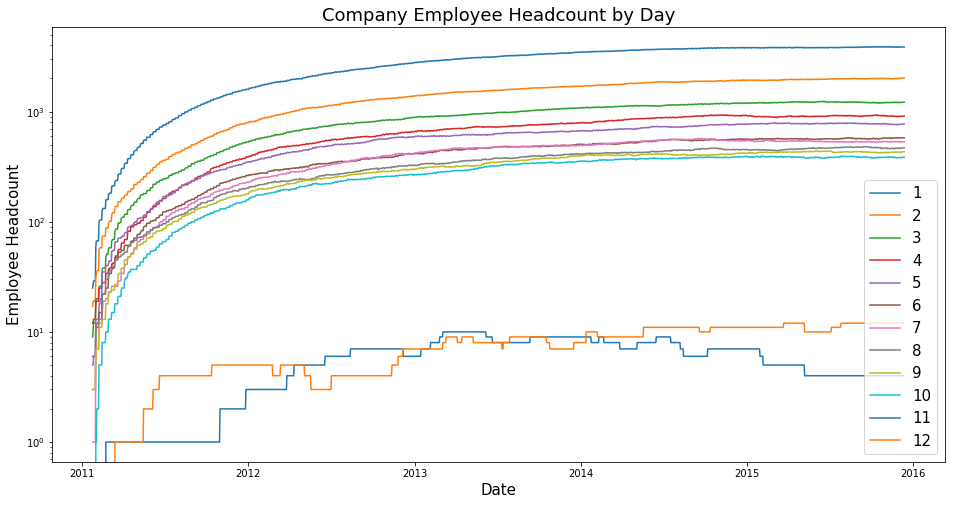

In [9]:
fig = plt.figure(figsize=(16,8))
for company in companies:

    plt.plot(head_count[head_count['company_id']==company]['date'], head_count[head_count['company_id']==company]['employee_headcount'], label=company)
#    head_count[head_count['company_id']==company].plot(x='date', y='employee_headcount', kind='line')
plt.legend(fontsize=15)
plt.yscale('log')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Employee Headcount', fontsize=15)
plt.title('Company Employee Headcount by Day', fontsize=18)

### Observation: company 11 and 12 are relatively smaller scale. 

## For each employee, create features that could possibly relate to churn

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24702 entries, 0 to 24701
Data columns (total 7 columns):
employee_id    24702 non-null float64
company_id     24702 non-null int64
dept           24702 non-null object
seniority      24702 non-null int64
salary         24702 non-null float64
join_date      24702 non-null datetime64[ns]
quit_date      13510 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2), object(1)
memory usage: 1.3+ MB


In [11]:
data['churn'] = np.where(data['quit_date'].isnull(), 0, 1)

In [12]:
data['employment_length'] = data['quit_date'] - data['join_date']
data['employment_length']= data['employment_length'].dt.days

In [13]:
data.dept.value_counts()

customer_service    9180
engineer            4613
data_science        3190
sales               3172
marketing           3167
design              1380
Name: dept, dtype: int64

In [14]:
data.seniority.value_counts().sort_index()

1      861
2      942
3      881
4      895
5      936
6      950
7      928
8     1008
9      944
10     927
11     924
12     988
13     894
14     920
15     911
16     936
17     893
18     872
19     910
20     844
21     782
22     764
23     785
24     743
25     715
26     694
27     642
28     585
29     626
98       1
99       1
Name: seniority, dtype: int64

In [15]:
data[data['seniority']>=98]

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,churn,employment_length
24700,97289.0,10,engineer,98,266000.0,2011-12-13,2015-01-09,1,1123.0
24701,604052.0,1,marketing,99,185000.0,2011-07-26,2013-12-06,1,864.0


In [16]:
data.describe()

,employee_id,company_id,seniority,salary,churn,employment_length
count,24702.000000,24702.000000,24702.000000,24702.000000,24702.000000,13510.000000
mean,501604.403530,3.426969,14.127803,138183.345478,0.546919,613.486825
std,288909.026101,2.700011,8.089520,76058.184573,0.497804,328.622613
min,36.000000,1.000000,1.000000,17000.000000,0.000000,102.000000
25%,250133.750000,1.000000,7.000000,79000.000000,0.000000,361.000000
50%,500793.000000,2.000000,14.000000,123000.000000,1.000000,417.000000
75%,753137.250000,5.000000,21.000000,187000.000000,1.000000,781.000000
max,999969.000000,12.000000,99.000000,408000.000000,1.000000,1726.000000


In [17]:
data.churn.value_counts()

1    13510
0    11192
Name: churn, dtype: int64

### Observations: There are 12 companies, 6 departments, 29 + 2 levels. 

In [54]:
# Bar plot for discrete variable

def barplot(df, var_col, tar_col, yscale='linear'):
    fig = plt.figure(figsize=(16,8))
    sns.countplot(x=var_col, hue=tar_col, data=df, order=df[var_col].value_counts().sort_index().index)
    plt.yscale(yscale)
    plt.ylabel(tar_col,  fontsize=15)
    plt.xlabel(var_col, fontsize=15)
    plt.legend(fontsize=15)
    return 

# histogram for continuous variable
#kws={"histtype": "bar", "alpha": 0.3}
kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}

def histplot(df, var_col, tar_col, binsize=20, yscale='linear'):
    fig = plt.figure(figsize=(16,8))
    tar_vals = df[tar_col].value_counts().index
    for tar_val in tar_vals:
        sns.distplot(df.loc[df[tar_col]==tar_val, var_col], bins=binsize, hist_kws=kws, kde=True, norm_hist=True, label=str(tar_val))
    plt.yscale(yscale)
    plt.ylabel(tar_col,  fontsize=15)
    plt.xlabel(var_col, fontsize=15)
#        plt.xlim(xlim1, xlim2)
    plt.legend(fontsize=15)
    return 


# Single histogram for one category of target variable
def histplot_single(df, var_col, tar_col, tar_val, binsize=20, yscale='linear'):
    fig = plt.figure(figsize=(16,8))
    sns.distplot(df.loc[df[tar_col]==tar_val, var_col], bins=binsize, hist_kws=kws, kde=False, norm_hist=True, label=str(tar_val))
    plt.yscale(yscale)
    plt.ylabel(tar_col,  fontsize=15)
    plt.xlabel(var_col, fontsize=15)
#        plt.xlim(xlim1, xlim2)
    plt.legend(fontsize=15)
    return 


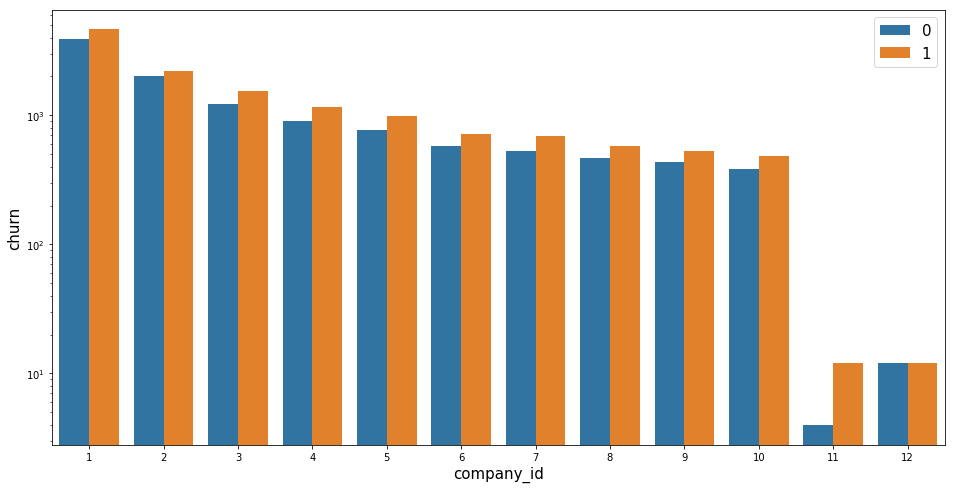

In [19]:
barplot(data, 'company_id', 'churn', yscale='log')

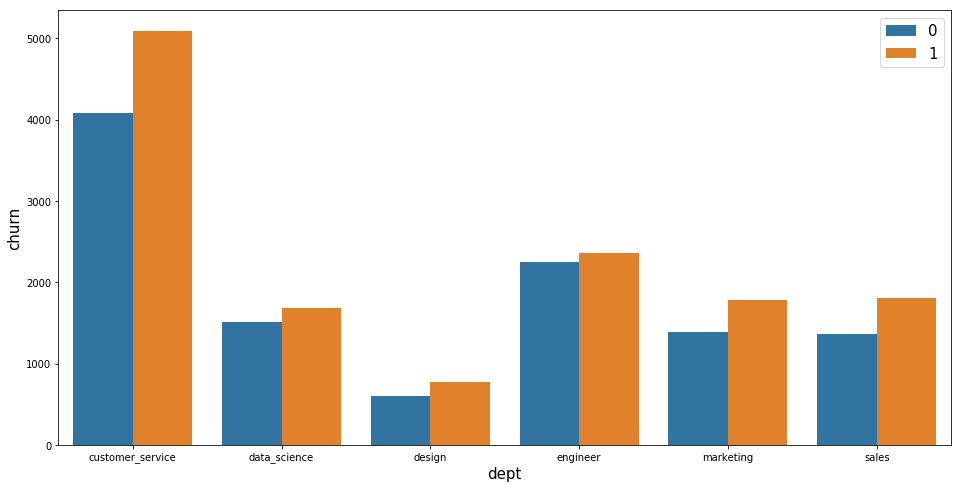

In [20]:
barplot(data, 'dept', 'churn', yscale='linear')

C:\Users\Mengfan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Mengfan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


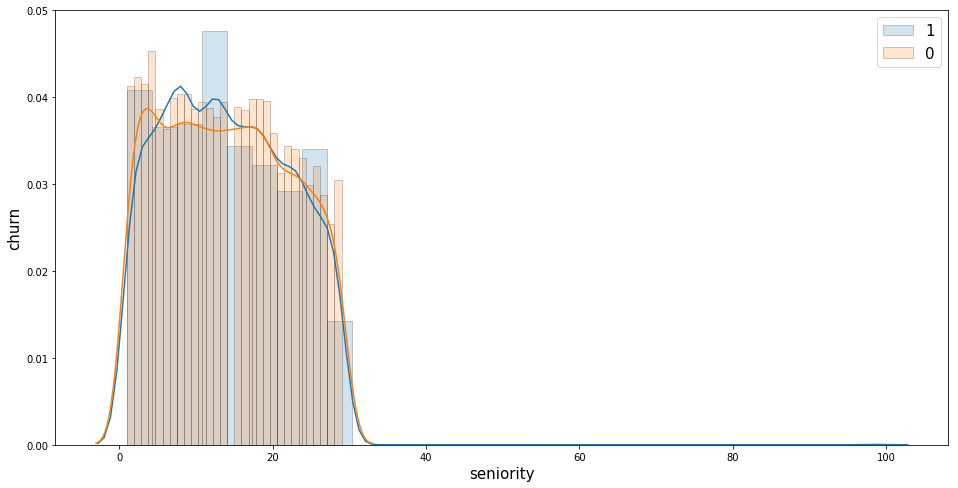

In [55]:
histplot(data, 'seniority', 'churn', binsize=30, yscale='linear')

C:\Users\Mengfan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Mengfan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


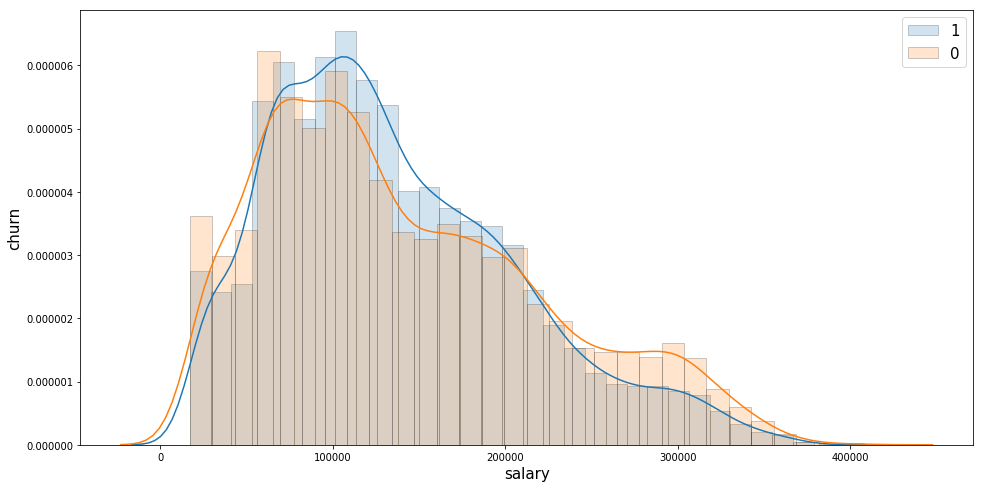

In [56]:
histplot(data, 'salary', 'churn', binsize=30, yscale='linear')

C:\Users\Mengfan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


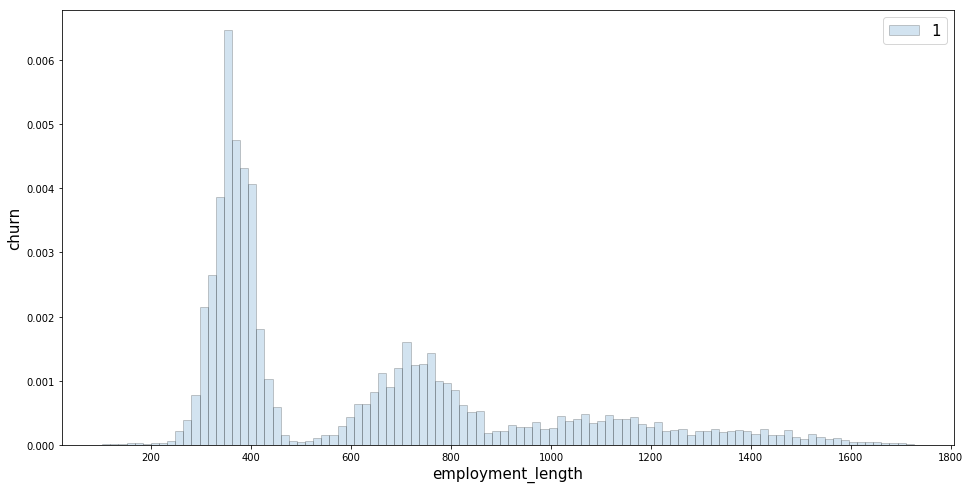

In [57]:

histplot_single(data, 'employment_length', 'churn', 1, binsize=100, yscale='linear')

C:\Users\Mengfan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


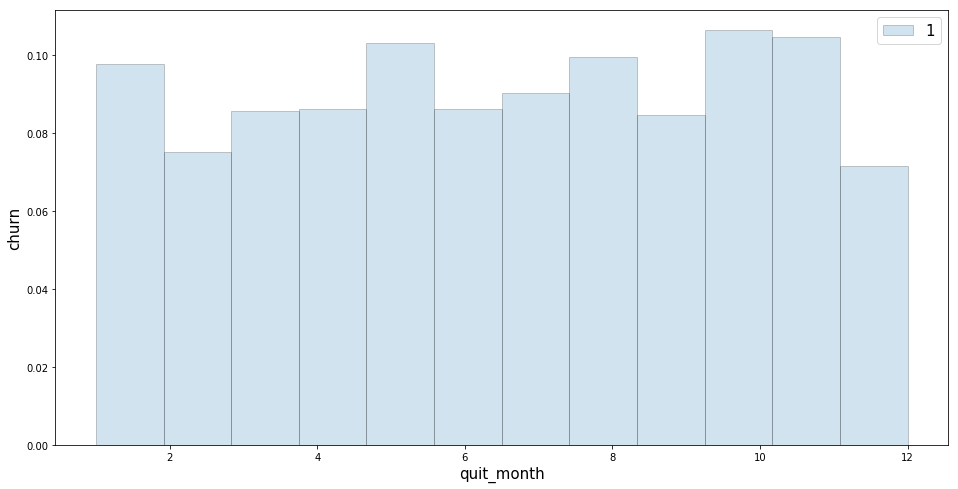

In [58]:
data['quit_month'] = data['quit_date'].dt.month

histplot_single(data, 'quit_month', 'churn', 1, binsize=12, yscale='linear')

### Customer service people churn more. 

### People with a intermediate level salary churn more. 

### People tend to churn less than 500 days on the job.

In [59]:
data.describe(include='all')

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,churn,employment_length,quit_month
count,24702.000000,24702.000000,24702,24702.000000,24702.000000,24702,13510,24702.000000,13510.000000,13510.000000
unique,NaN,NaN,6,NaN,NaN,995,664,NaN,NaN,NaN
top,NaN,NaN,customer_service,NaN,NaN,2012-01-03 00:00:00,2015-05-08 00:00:00,NaN,NaN,NaN
freq,NaN,NaN,9180,NaN,NaN,105,111,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,2011-01-24 00:00:00,2011-10-13 00:00:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2015-12-10 00:00:00,2015-12-09 00:00:00,NaN,NaN,NaN
mean,501604.403530,3.426969,NaN,14.127803,138183.345478,NaN,NaN,0.546919,613.486825,6.550925
std,288909.026101,2.700011,NaN,8.089520,76058.184573,NaN,NaN,0.497804,328.622613,3.408746
min,36.000000,1.000000,NaN,1.000000,17000.000000,NaN,NaN,0.000000,102.000000,1.000000
25%,250133.750000,1.000000,NaN,7.000000,79000.000000,NaN,NaN,0.000000,361.000000,4.000000


### Use a simple decision tree to see which variables the tree splits on. Use binary class for churn as target.

In [71]:
# Only consider people who have joined company more than 13 months ago

date3 = data['join_date'].max() - datetime.timedelta(days=365+31)

y = data.loc[data['join_date']<date3, 'churn']
X = data.loc[data['join_date']<date3, ['company_id', 'dept', 'seniority', 'salary']]


from sklearn.preprocessing import OneHotEncoder, LabelEncoder
le = LabelEncoder()
le.fit(data['dept'])
X['dept_code'] = le.transform(X['dept'])

X = X[['company_id', 'dept_code', 'seniority', 'salary']]
X.head()

,company_id,dept_code,seniority,salary
0,7,0,28,89000.0
1,7,4,20,183000.0
2,4,4,14,101000.0
3,7,0,20,115000.0
4,2,1,23,276000.0


In [72]:
# Do a stratified 80-20 train-test split

from sklearn.model_selection import train_test_split
X_train, X_holdout, y_train, y_holdout = train_test_split(X,y, test_size=0.2, random_state=0, shuffle=True, stratify=y )
print(len(y_train), len(y_holdout))
print(y_holdout.value_counts(normalize=True))
print(y_train.value_counts(normalize=True))

15363 3841
1    0.692788
0    0.307212
Name: churn, dtype: float64
1    0.692899
0    0.307101
Name: churn, dtype: float64


In [75]:
# Test using a simple decision tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, auc, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
dtree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=30, random_state=1)
#dtree = DecisionTreeClassifier(random_state=1, max_depth=2, min_samples_leaf=10, max_leaf_nodes=20, min_samples_split=10)
#dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
pred_prob_train = dtree.predict_proba(X_train)
roc_auc_train = roc_auc_score(y_train, pd.DataFrame(pred_prob_train)[1])
print('ROC_AUC for train set is {}'.format(roc_auc_train))

pred_prob_holdout = dtree.predict_proba(X_holdout)
roc_auc_holdout = roc_auc_score(y_holdout, pd.DataFrame(pred_prob_holdout)[1])
print('ROC_AUC for test set is {}'.format(roc_auc_holdout))

ROC_AUC for train set is 0.5686099188202404
ROC_AUC for test set is 0.5658223937732088


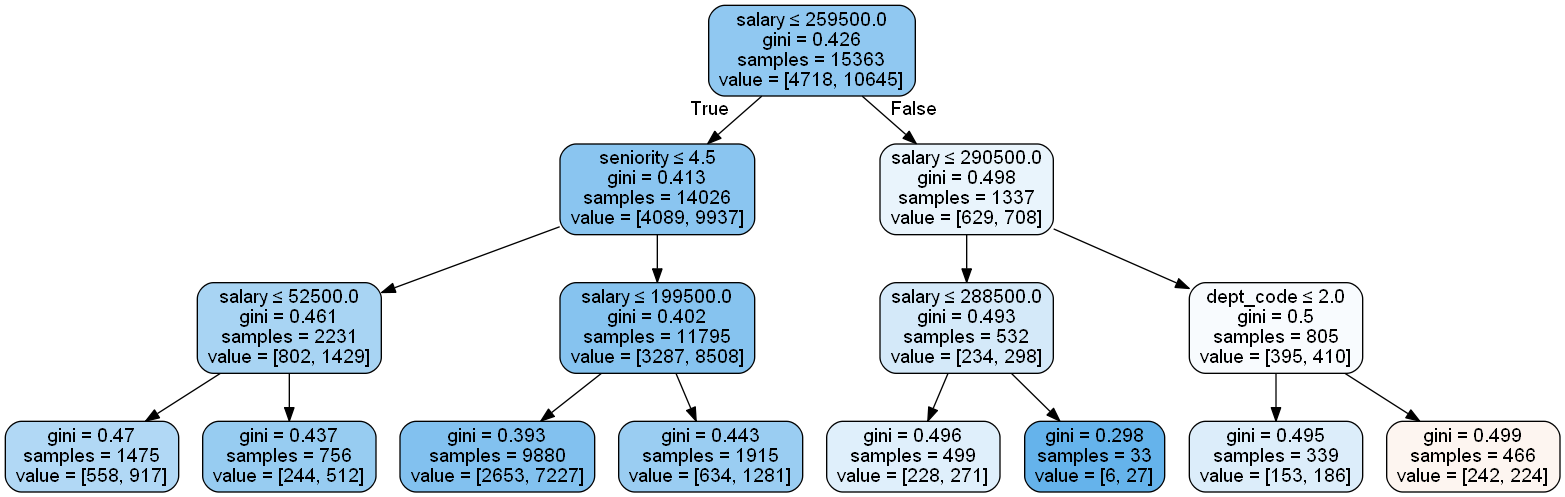

In [76]:
# Plot the tree structure
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
               feature_names=X.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

      feature  importance
3  company_id    0.000000
2   dept_code    0.014347
1   seniority    0.193748
0      salary    0.791905


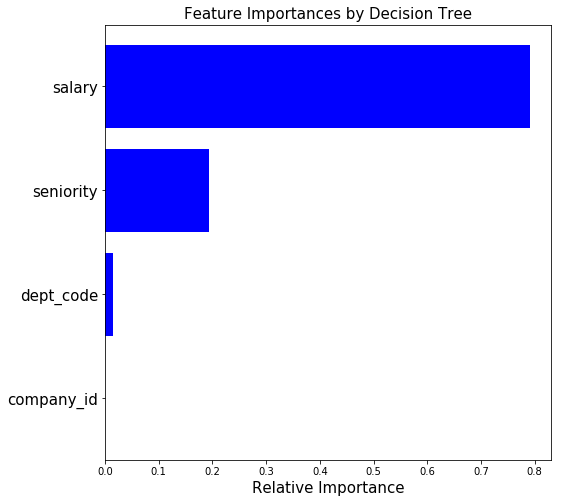

In [91]:
# Feature importance
features = list(X.columns)
importance = sorted(zip(features, dtree.feature_importances_), key=lambda x:x[1], reverse=True)
importances = pd.DataFrame(importance, columns=['feature', 'importance']).sort_values('importance', ascending=True)

print(importances)
    
fig = plt.figure(figsize=(8, 8))
plt.title('Feature Importances by Decision Tree', fontsize=15)
plt.barh(range(len(importances)), importances['importance'], color='b', align='center')
plt.yticks(range(len(importances)), importances['feature'], fontsize=15)
plt.xlabel('Relative Importance', fontsize=15)
plt.show()

### In conclusion, salary has the largest effect on employee churn. People who make middle range salaries tend to churn, possibly because people who make very low or very high salaries cannot easily find new jobs. 

### People also tend to churn around work aniversaries. 

### It's best if we can find data for the new job salaries. 